<a href="https://colab.research.google.com/github/51stDimension/EDAExperiments/blob/main/Experiment%205/EXP5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns 
import missingno 

# **Problem 1: Loading the Dataset**

In [2]:
email = pd.read_csv('https://raw.githubusercontent.com/51stDimension/EDAExperiments/main/Experiment%205/emails.csv')

In [3]:
email.head()

,text,spam
0,Subject: naturally irresistible your corporate...,1
1,Subject: the stock trading gunslinger fanny i...,1
2,Subject: unbelievable new homes made easy im ...,1
3,Subject: 4 color printing special request add...,1
4,"Subject: do not have money , get software cds ...",1


Q1 : How many emails are in the dataset?

In [4]:
len(email)

5728

Q2 : How many spam emails are in the dataset?

In [5]:
len(email[email.spam == 1])

1368

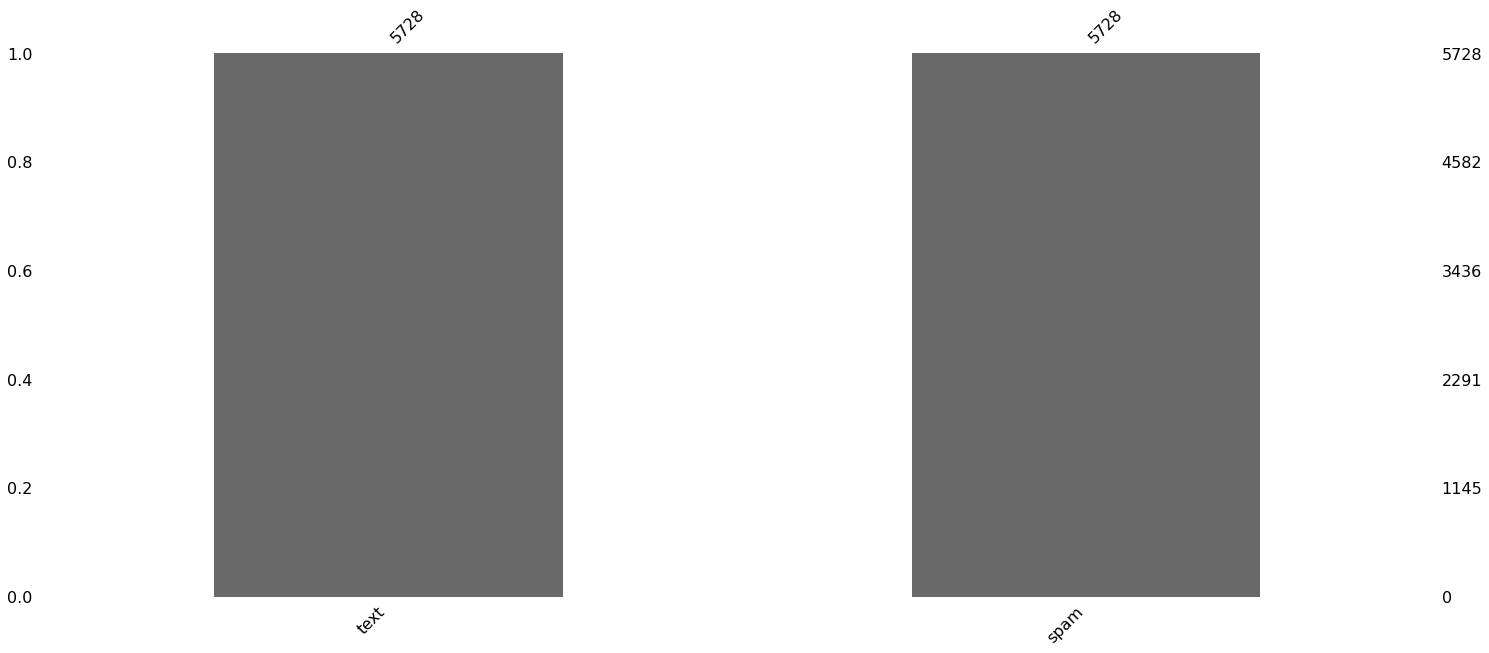

In [6]:
# To check for missing values
missingno.bar(email)

Above plot's conclusion: We have no missing values.

In [8]:
# Removing repeated values
email = email.drop_duplicates()
print('Changes in the dataset after removing duplicates: ')
print(f'Length of Dataset {len(email)}')
print(f'No of Spam Messages {len(email[email.spam == 1])}')

Changes in the dataset after removing duplicates: 
Length of Dataset 5695
No of Spam Messages 1368


Data Cleaning

1) Removing punctuation marks from the dataset

In [10]:
import string
punctuations = list(string.punctuation)
# Printing the list of punctuation marks present
print(punctuations)

['!', '"', '#', '$', '%', '&', "'", '(', ')', '*', '+', ',', '-', '.', '/', ':', ';', '<', '=', '>', '?', '@', '[', '\\', ']', '^', '_', '`', '{', '|', '}', '~']


We will be using NLTK RegexTokenzier to select alphanumeric words and removing 

the punctuation marks 

In [14]:
from nltk.tokenize import RegexpTokenizer
tokenizer = RegexpTokenizer(r'\w+')

In [15]:
def remove_punctuations(input_sentence):
    sentence_words_list_without_punctuations = tokenizer.tokenize(input_sentence)
    processed_string = ' '.join(sentence_words_list_without_punctuations)
    return processed_string

In [16]:
email['text'] = email['text'].apply(remove_punctuations)
email.head()

,text,spam
0,Subject naturally irresistible your corporate ...,1
1,Subject the stock trading gunslinger fanny is ...,1
2,Subject unbelievable new homes made easy im wa...,1
3,Subject 4 color printing special request addit...,1
4,Subject do not have money get software cds fro...,1


In [31]:
email['text'].apply(lambda x: x.split(' ')[0].lower()).unique()

array(['subject'], dtype=object)

In [18]:
email.head()

,text,spam
0,Subject naturally irresistible your corporate ...,1
1,Subject the stock trading gunslinger fanny is ...,1
2,Subject unbelievable new homes made easy im wa...,1
3,Subject 4 color printing special request addit...,1
4,Subject do not have money get software cds fro...,1


Q: **Could a spam classifier potentially benefit from including the frequency of the word that appears in every email?**
Yes -- the number of times the word appears might help us differentiate spam from ham.
No -- the word appears in every email so this variable would not help us differentiate spam from ham.

Depends on the situation. Some common words appear in both ham and spam and would not help much in differentiating but some words which are specific to their type i.e spam or ham will help us a lot in differentiating spam and ham and counting their frequency will help us a lot.

Q: **The nchar() function counts the number of characters in a piece of text. How many characters are in the longest email in the dataset (where longest is measured in terms of the maximum number of characters)?**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


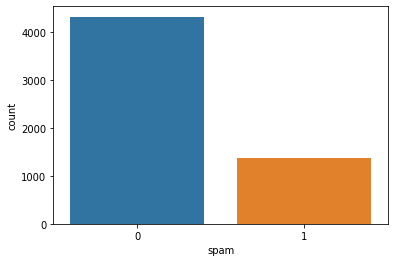

In [19]:
sns.countplot(email['spam'])

We can see that the number of mails which are non-spam is much higher as compared to the ones which are spam.

Adding a new column to analyze text length

In [21]:
email['text_length'] = email['text'].apply(len)
email.head()

,text,spam,text_length
0,Subject naturally irresistible your corporate ...,1,1403
1,Subject the stock trading gunslinger fanny is ...,1,593
2,Subject unbelievable new homes made easy im wa...,1,424
3,Subject 4 color printing special request addit...,1,444
4,Subject do not have money get software cds fro...,1,207


In [23]:
maxlen = email["text_length"].max()
maxindex = email["text_length"].idxmax()
print(maxlen,maxindex)
email["spam"][2650]

41301 2650


0

In [24]:
email["text"][2650]

'Subject from the enron india newsdesk april 27 th newsclips fyi news articles from indian press forwarded by sandeep kohli enron _ development on 04 27 2001 08 24 am nikita varma 04 27 2001 07 51 am to nikita varma enron _ development enron _ development cc bcc sandeep kohli enron _ development subject from the enron india newsdesk april 27 th newsclips friday apr 27 2001 http www economictimes com today cmo 3 htm dpc board empowers md to cancel mseb contract friday apr 27 2001 http www economictimes com today 27 compl 1 htm mseb pays rs 134 cr under protest to dpc friday april 27 001 http www businessstandard com today economy 4 asp menu 3 enron india md authorised to terminate ppa friday april 27 2001 http www financialexpress com fe 20010427 topl html foreign lenders slam brakes on disbursements to dpc sanjay jog raghu mohan global banks comfortable with enron pull out friday april 27 2001 http www indian express com ie 20010427 nat 23 html enron dabhol chief gets powers to end dea

The above shown mail is the one which has the maximum length of 41k and is not a spam message

In [25]:
import nltk
from nltk.corpus import stopwords

# Build a new corpus variable called corpus.
corpus = pd.DataFrame()
corpus['text'] = email['text']
corpus['spam'] = email['spam']

# Using tm_map, convert the text to lowercase.
corpus['text'] = corpus['text'].apply(lambda x: x.lower())

# Remove all punctuation from the corpus.
corpus['text'] = corpus['text'].map(remove_punctuations)

# Remove all English stop words from the corpus.
nltk.download("stopwords")
print(stopwords.words('english'))

# creating the stopwords dictionary object
from collections import Counter
stop_words = stopwords.words('english')
stopwords_dict = Counter(stop_words)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [26]:
def remove_stopwords_from_sentence(sentence):
    modified_sentence = ' '.join([word for word in sentence.split() if word not in stopwords_dict])
    return modified_sentence

In [27]:
# remove stopwords from the sentence
corpus['text'] = corpus['text'].apply(remove_stopwords_from_sentence)

In [28]:
corpus.head()

,text,spam
0,subject naturally irresistible corporate ident...,1
1,subject stock trading gunslinger fanny merrill...,1
2,subject unbelievable new homes made easy im wa...,1
3,subject 4 color printing special request addit...,1
4,subject money get software cds software compat...,1


Stemming the corpus:
which is reducing a word to its dictionary root

In [32]:
from nltk.stem import PorterStemmer
ps = PorterStemmer()

In [33]:
def stem_words_in_sentence(sentence):
    modified_sentence = ' '.join([ps.stem(word) for word in sentence.split()])
    return modified_sentence

corpus['text'] = corpus['text'].apply(stem_words_in_sentence)
corpus.head()

,text,spam
0,subject natur irresist corpor ident lt realli ...,1
1,subject stock trade gunsling fanni merril muzo...,1
2,subject unbeliev new home made easi im want sh...,1
3,subject 4 color print special request addit in...,1
4,subject money get softwar cd softwar compat gr...,1


In [37]:
# Build a document term matrix from the corpus, called dtm
from sklearn.feature_extraction.text import CountVectorizer
vec = CountVectorizer()
dtm  = vec.fit_transform(corpus['text'])

In [38]:
dtm.shape

(5695, 29222)

In [40]:
# How many terms are in dtm? To obtain a more reasonable number of terms, 
# limit dtm to contain terms appearing in at least 5% of documents, 
# and store this result as spdtm (don't overwrite dtm, because we will use it in 
# a later step of this homework).
print(f'No of terms in the document term matrix is {dtm.shape[1]}')

five_percent_vectorizer = CountVectorizer(min_df = 0.05)
five_percent_document_term_matrix = five_percent_vectorizer.fit_transform(corpus['text'])

print(f'No of terms in the the five percent document term matrix is {five_percent_document_term_matrix.shape[1]}')

No of terms in the document term matrix is 29222
No of terms in the the five percent document term matrix is 368


In [41]:
SEED = 123
np.random.seed(SEED)

In [42]:
# creating the train and test data from document term matrix by splitting the train and test in the ratio 70:30
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(dtm, corpus['spam'], test_size=0.3, random_state=SEED)

Implementing the CART Model

In [43]:
from sklearn import tree
clf = tree.DecisionTreeClassifier()
clf.fit(X_train, y_train)

DecisionTreeClassifier()

In [44]:
# What is the training set accuracy of spamCART, using a threshold of 0.5 for predictions?

# finding the training data accuracy of the model
from sklearn.metrics import accuracy_score
print(accuracy_score(clf.predict(X_test), y_test))

0.9566998244587478


In [45]:
# plotting the confusion matrix
from sklearn.metrics import confusion_matrix
print(confusion_matrix(clf.predict(X_test), y_test))

[[1267   32]
 [  42  368]]


In [46]:
# printing a more detailed analysis of the CART model 
from sklearn.metrics import classification_report
print(classification_report(clf.predict(X_test), y_test))

              precision    recall  f1-score   support

           0       0.97      0.98      0.97      1299
           1       0.92      0.90      0.91       410

    accuracy                           0.96      1709
   macro avg       0.94      0.94      0.94      1709
weighted avg       0.96      0.96      0.96      1709



In [47]:
# What is the training set AUC of spamCART?
from sklearn.metrics import roc_auc_score
print(roc_auc_score(clf.predict(X_test), y_test))

0.9364633207532999


Implementing the RANDOM FOREST Model

In [48]:
from sklearn.ensemble import RandomForestClassifier
random_forest_classifier = RandomForestClassifier()
random_forest_classifier.fit(X_train, y_train)

RandomForestClassifier()

In [49]:
# What is the training set accuracy of spamRF, using a threshold of 0.5 for predictions?

# finding the training data accuracy of the model
from sklearn.metrics import accuracy_score
print(accuracy_score(random_forest_classifier.predict(X_test), y_test))

0.9806904622586308


In [50]:
# plotting the confusion matrix
from sklearn.metrics import confusion_matrix
print(confusion_matrix(random_forest_classifier.predict(X_test), y_test))

[[1304   28]
 [   5  372]]


In [51]:
# printing a more detailed analysis of the rf model 
from sklearn.metrics import classification_report
print(classification_report(random_forest_classifier.predict(X_test), y_test))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99      1332
           1       0.93      0.99      0.96       377

    accuracy                           0.98      1709
   macro avg       0.96      0.98      0.97      1709
weighted avg       0.98      0.98      0.98      1709



In [52]:
# What is the training set AUC of spamRF?
from sklearn.metrics import roc_auc_score
print(roc_auc_score(random_forest_classifier.predict(X_test), y_test))

0.9828581897547416


Looking closely we can infer that the precision and recall score are very good compared to the CART Model, we have a precision value of 1 or 100% which shows that all positive samples are classified as positive, and there is not any Negative sample that is incorrectly classified.